# Notebook Elismar

Resolvi fazer esse exercício para você brincar um pouco e explorar.

Os objetivos aqui são os seguintes:
* Concatenar os campos que contém as magnitudes R com o Stilts
* Concatenar os campos que contém as magnitudes G com o Stilts
* Usar o Stilts para pegar só algumas colunas desses dois arquivos (ID, RA, DEC e a magnitude em uma abertura que vc pode escolher)
* Fazer um crossmatch entre os dois com o Stilts
* Salvar o resultado em um .csv
* Abrir esse .csv com o Pandas e fazer alguns plots:
  * Distribuição de magnitudes
  * Distribuição de objetos (RA, e Dec) usando o hexbin.
  
Algumas dicas:
* Vc pode obter todos os arquivos de uma pasta usando o os e list comprehension
* Infos do Stilts: http://www.star.bris.ac.uk/~mbt/stilts/#commands (vc vai precisar do tcat, tskymatch2 e do tpipe)

Exemplos:
* List comprehension
    * [s for s in os.listdir(Diretório)]
* Stilts
    * os.system(f"""java -jar stilts.jar tpipe in=Input_File.fits cmd='(comando que vc acha no manual do Stilts)' out=Output_File.csv""")

In [1]:
import pandas as pd
import numpy  as np
import os

from pathlib import Path

### 1st: Concatenating R and G fields

In [2]:
#Using 'os' in order to change directories to Fields/

original_dir = '/hd2/Mestrado/Pesquisa/Codes/to_play/'
fields_dir = os.path.join(original_dir, 'Fields')
os.chdir(fields_dir)
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

Current working directory: /hd2/Mestrado/Pesquisa/Codes/to_play/Fields


In [3]:
#Creating two lists, fields_R and fields_G, containing the names of the fields in R and G magnitudes

fields = os.listdir(cwd)
fields_R = []
fields_G = []
for i in range(len(fields)):
    if (str(fields[i])[-11] == 'R'):
        fields_R.append(fields[i])
    
    elif (str(fields[i])[-11] == 'G'):
        fields_G.append(fields[i])

In [5]:
fields_G

['SPLUS-n14s31_G_dual.fits',
 'SPLUS-n11s33_G_dual.fits',
 'SPLUS-n12s32_G_dual.fits',
 'SPLUS-n13s32_G_dual.fits',
 'SPLUS-n12s31_G_dual.fits',
 'SPLUS-n15s33_G_dual.fits',
 'SPLUS-n12s33_G_dual.fits',
 'SPLUS-n15s31_G_dual.fits',
 'SPLUS-n15s32_G_dual.fits',
 'SPLUS-n13s31_G_dual.fits',
 'SPLUS-n11s34_G_dual.fits',
 'SPLUS-n12s30_G_dual.fits',
 'SPLUS-n14s32_G_dual.fits',
 'SPLUS-n13s33_G_dual.fits',
 'SPLUS-n14s33_G_dual.fits',
 'SPLUS-n12s34_G_dual.fits']

In [ ]:
#Saving the lists in txt files in the to_play/ directory

os.chdir(original_dir)
np.savetxt('fields_R.txt', fields_R, fmt='%s')
np.savetxt('fields_G.txt', fields_G, fmt='%s')

In [ ]:
#Runing stilts tcat over the fields
os.chdir(fields_dir)
os.system(f"""java -jar ../stilts.jar tcat in=@../fields_R.txt out=fields_R_concatenated.fits""")
os.system(f"""java -jar ../stilts.jar tcat in=@../fields_G.txt out=fields_G_concatenated.fits""")

### 2nd: Using stilts to get some columns of the tables

In [7]:
os.system(f"""java -jar ../stilts.jar tpipe ifmt=fits in=fields_G_concatenated.fits \
    cmd='keepcols "FIELD_ID RA DEC g_APER_3"' omode=out ofmt=fits out=fields_G_short.fits""")

os.system(f"""java -jar ../stilts.jar tpipe ifmt=fits in=fields_R_concatenated.fits \
    cmd='keepcols "FIELD_ID RA DEC r_APER_3"' omode=out ofmt=fits out=fields_R_short.fits""")

0

### 3rd: Crossmatching the fields

In [14]:
os.system(f"""java -jar ../stilts.jar tskymatch2 in1=fields_G_short.fits in2=fields_R_short.fits \
    out=matched_tables.csv ra1=RA dec1=DEC ra2=RA dec2=DEC error=3""")

0

In [15]:
ls

fields_G_concatenated.fits  SPLUS-n12s31_R_dual.fits  SPLUS-n14s31_G_dual.fits
fields_G_short.fits         SPLUS-n12s32_G_dual.fits  SPLUS-n14s31_R_dual.fits
fields_R_concatenated.fits  SPLUS-n12s32_R_dual.fits  SPLUS-n14s32_G_dual.fits
fields_R_short.fits         SPLUS-n12s33_G_dual.fits  SPLUS-n14s32_R_dual.fits
matched_tables.csv          SPLUS-n12s33_R_dual.fits  SPLUS-n14s33_G_dual.fits
matched_tables.fits         SPLUS-n12s34_G_dual.fits  SPLUS-n14s33_R_dual.fits
SPLUS-n11s33_G_dual.fits    SPLUS-n12s34_R_dual.fits  SPLUS-n15s31_G_dual.fits
SPLUS-n11s33_R_dual.fits    SPLUS-n13s31_G_dual.fits  SPLUS-n15s31_R_dual.fits
SPLUS-n11s34_G_dual.fits    SPLUS-n13s31_R_dual.fits  SPLUS-n15s32_G_dual.fits
SPLUS-n11s34_R_dual.fits    SPLUS-n13s32_G_dual.fits  SPLUS-n15s32_R_dual.fits
SPLUS-n12s30_G_dual.fits    SPLUS-n13s32_R_dual.fits  SPLUS-n15s33_G_dual.fits
SPLUS-n12s30_R_dual.fits    SPLUS-n13s33_G_dual.fits  SPLUS-n15s33_R_dual.fits
SPLUS-n12s31_G_dual.fits    SPLUS-n13s33_R_dual.fits

### 4th: Some plots using pandas

In [20]:
matched_tables = pd.read_csv('matched_tables.csv')

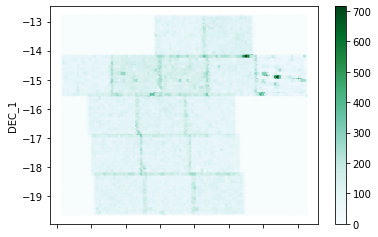

In [33]:
matched_tables.plot.hexbin(x='RA_1', y='DEC_1', gridsize=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f977122c8d0>]],
      dtype=object)

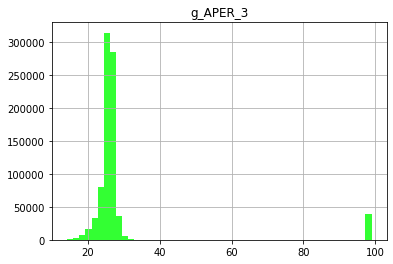

In [39]:
matched_tables.hist('g_APER_3', bins=50, color='lime', alpha=0.8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f97712114d0>]],
      dtype=object)

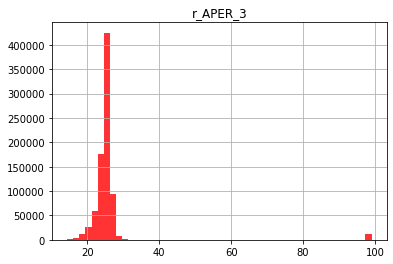

In [40]:
matched_tables.hist('r_APER_3', bins=50, color='red', alpha=0.8)